# Loading the MNIST Dataset in PyTorch

In [2]:
import torch   # Importing the PyTorch library for building machine learning models

In [3]:
import torchvision   # Importing the torchvision library, which provides popular datasets and tools for computer visionimport torchvision   # Importing the torchvision library, which provides popular datasets and tools for computer vision

In [4]:
print("PyTorch version",torch.__version__)   # Printing the version of PyTorch being used to ensure compatibility

PyTorch version 2.2.2


In [5]:
torchvision.datasets.MNIST   # Loads the MNIST dataset of handwritten digits (0-9)

torchvision.datasets.mnist.MNIST

In [6]:
import torch   # Imports PyTorch
from torchvision import datasets, transforms   # Imports torchvision datasets and transforms for preprocessing data.
from torch.utils.data import DataLoader   # Imports DataLoader, a utility to load datasets and batch them for training.
import matplotlib.pyplot as plt   # Imports matplotlib for data visualization.

In [7]:
transform = transforms.Compose([transforms.ToTensor(),   # Converts the images to PyTorch tensors.
                                transforms.Normalize((0.5,), (0.5,))   # Normalizes the tensor values to the range [-1, 1] 
                               ])

In [8]:
import torch   # Imports PyTorch
from torchvision import datasets, transforms   # Imports torchvision datasets and transforms for preprocessing data.
from torch.utils.data import DataLoader   # Imports DataLoader, a utility to load datasets and batch them for training.
import matplotlib.pyplot as plt   # Imports matplotlib for data visualization.


In [9]:
# Load the training dataset (MNIST), apply the transformations, and download if necessary.
train_dataset = datasets.MNIST(root='./datasets', train=True, download=True, transform=transform)

In [10]:
# Create a DataLoader for the training set with a batch size of 64 and shuffling enabled.
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)

In [11]:
# Load the test dataset (MNIST), apply the transformations, and download if necessary.
test_dataset = datasets.MNIST(root='./datasets', train=False, download=True, transform=transform)

In [12]:
# Create a DataLoader for the test set with a batch size of 64, without shuffling.
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)

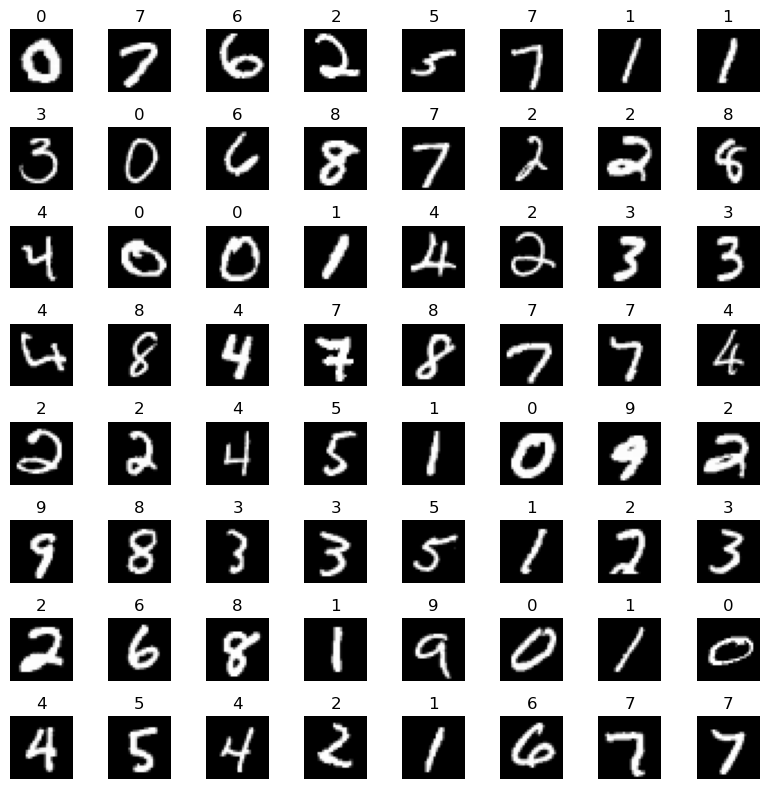

In [13]:
# Function to visualize a batch of images from the loader.
def show_batch(loader):
    data_iter = iter(loader)   # Create an iterator to go through the DataLoader.
    images, labels = next(data_iter)   # Get the next batch of images and labels.
    fig, axes = plt.subplots(8, 8, figsize=(8, 8))    # Create an 8x8 grid of subplots to display 64 images.
    axes = axes.flatten()   # Flatten the axes to a 1D array for easier indexing.
    for i in range(64):   # Loop through the 64 images.
        image = images[i].numpy().squeeze()   # Convert the image tensor to a NumPy array and remove extra dimensions.
        axes[i].imshow(image, cmap='gray')   # Display the image in grayscale.
        axes[i].set_title(f'{labels[i].item()}')   # Set the title of each subplot to the corresponding label.
        axes[i].axis('off')   # Turn off axis ticks and labels.
    plt.tight_layout()   # Adjust the layout to prevent overlapping.
    plt.show()   # Display the grid of images.

show_batch(train_loader)   # Call the function to show a batch of training images.


In [14]:
import torch   # Imports PyTorch
from torchvision import datasets, transforms   # Imports torchvision datasets and transforms for preprocessing data.
from torch.utils.data import DataLoader   # Imports DataLoader, a utility to load datasets and batch them for training.
import matplotlib.pyplot as plt   # Imports matplotlib for data visualization.

custom_transform = transforms.Compose([
    transforms.Resize((28, 28)),   # Ensure all images are resized to 28x28 pixels  
    transforms.ToTensor(),    # Convert image to a PyTorch tensor and normalize pixel values to [0, 1]                       
    transforms.RandomRotation(10),   # Apply a random rotation to the image by up to 10 degrees 
    transforms.RandomCrop(28),   # Crop to 28x28 pixels randomly
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),   # Adjust color properties
    transforms.GaussianBlur(kernel_size=3, sigma=(0.1, 2.0)),   # Apply Gaussian blur
    
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),    # Apply random translation to shift images by 10% of width and height
    transforms.Pad(2),    # Add padding of 2 pixels to increase image size to 34x34                          
    
    transforms.Normalize((0.5,), (0.5,)),])    # Normalize tensor values to the range [-1, 1]

In [15]:
# Load the MNIST dataset for training and testing
train_dataset = datasets.MNIST(root='./datasets', train=True, download=True, transform=custom_transform)
test_dataset = datasets.MNIST(root='./datasets', train=False, download=True, transform=custom_transform)

In [16]:
# Create DataLoader objects for batching and shuffling the data during training/testing
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

Type of images: <class 'torch.Tensor'>, Type of labels: <class 'torch.Tensor'>
Shape of images: torch.Size([64, 1, 32, 32])


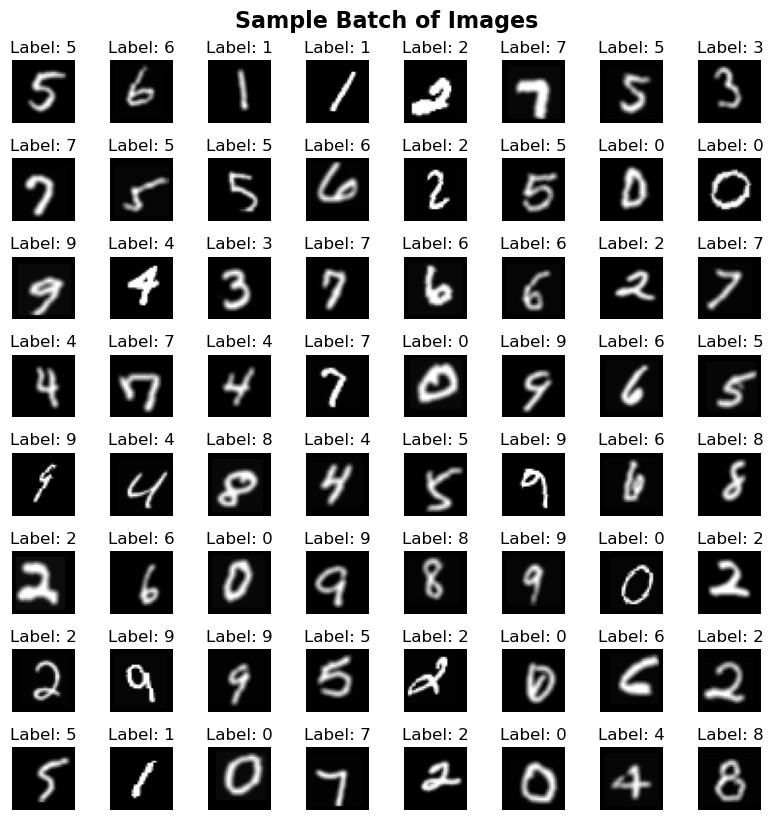

In [17]:
def show_batch(loader, num_images=64):
    data_iter = iter(loader)  # Create an iterator from the data loader
    images, labels = next(data_iter)  # Get a batch of images and labels

    # Debugging output to check the type of images and labels
    print(f'Type of images: {type(images)}, Type of labels: {type(labels)}')
    print(f'Shape of images: {images.shape if isinstance(images, torch.Tensor) else "Not a tensor"}')

    num_cols = 8  # Determine the number of columns for the subplot grid
    num_rows = num_images // num_cols if num_images % num_cols == 0 else (num_images // num_cols) + 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols, num_rows))  # Set up the figure for displaying images
    axes = axes.flatten()

    for i in range(num_images):  # Loop through the number of images to display
        image = images[i].numpy().squeeze()  # Convert image tensor to numpy array
        axes[i].imshow(image, cmap='gray')  # Display the image in grayscale
        axes[i].set_title(f'Label: {labels[i].item()}')  # Show the corresponding label
        axes[i].axis('off')  # Hide the axes

    for j in range(num_images, len(axes)):  # Hide any remaining empty subplots
        axes[j].axis('off')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.suptitle('Sample Batch of Images', fontsize=16, fontweight='bold', y=1.02)  # Title for the entire plot
    plt.show()  # Show the figure

# Show a batch of images from the train_loader
show_batch(train_loader)


In [18]:
images, labels = next(iter(train_loader))
print(f'Images type: {type(images)}')  # Should be <class 'torch.Tensor'>
print(f'Labels type: {type(labels)}')  # Should be <class 'torch.Tensor'>


Images type: <class 'torch.Tensor'>
Labels type: <class 'torch.Tensor'>


# Baseline Model with Multilayer Perceptrons

In [20]:
import torch  # Importing PyTorch library
import torch.nn as nn  # Importing neural network module from PyTorch
import torch.optim as optim  # Importing optimization algorithms
from torch.utils.data import DataLoader  # Importing DataLoader for handling datasets
from torchvision import datasets, transforms  # Importing datasets and transformations from torchvision
from sklearn.metrics import precision_score, recall_score, f1_score  # Importing evaluation metrics

# Define an MLP Model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()  # Initialize the parent class
        self.fc1 = nn.Linear(28*28, 256)  # Input layer to first hidden layer with 256 neurons
        self.bn1 = nn.BatchNorm1d(256)  # Batch normalization after the first hidden layer
        self.fc2 = nn.Linear(256, 128)  # First hidden layer to second hidden layer with 128 neurons
        self.bn2 = nn.BatchNorm1d(128)  # Batch normalization after the second hidden layer
        self.fc3 = nn.Linear(128, 64)  # Second hidden layer to third hidden layer with 64 neurons
        self.bn3 = nn.BatchNorm1d(64)  # Batch normalization after the third hidden layer
        self.fc4 = nn.Linear(64, 10)  # Third hidden layer to output layer (10 classes for digits 0-9)
        self.dropout = nn.Dropout(0.3)  # Dropout layer to reduce overfitting

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the input image to a 1D vector
        x = torch.relu(self.bn1(self.fc1(x)))  # First hidden layer with ReLU and batch normalization
        x = self.dropout(x)  # Apply dropout
        x = torch.relu(self.bn2(self.fc2(x)))  # Second hidden layer with ReLU and batch normalization
        x = self.dropout(x)  # Apply dropout
        x = torch.relu(self.bn3(self.fc3(x)))  # Third hidden layer with ReLU and batch normalization
        x = self.fc4(x)  # Output layer
        return x  # Return the output logits

# Load the MNIST dataset with normalization transformation
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.MNIST(root='./datasets', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./datasets', train=False, download=True, transform=transform)
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Initialize the model, loss function, and optimizer
model = MLP()  # Instantiate the MLP model
loss_fn = nn.CrossEntropyLoss()  # Define the loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Optimizer with learning rate

# Training function
def train_model(model, train_loader, loss_fn, optimizer, epochs=10):
    for epoch in range(epochs):  # Loop over epochs
        model.train()  # Set model to training mode
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:  # Loop over batches
            # Forward pass
            outputs = model(images)  # Model predictions
            loss = loss_fn(outputs, labels)  # Loss calculation

            # Backward pass and optimization
            optimizer.zero_grad()  # Reset gradients
            loss.backward()  # Backpropagate
            optimizer.step()  # Update parameters

            # Compute accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            running_loss += loss.item()

        accuracy = 100 * correct / total
        print(f'Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {accuracy:.2f}%')

# Testing and Evaluation function with additional metrics
def test_model(model, test_loader):
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []

    with torch.no_grad():  # Disable gradient calculation for testing
        for images, labels in test_loader:
            outputs = model(images)  # Model predictions
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            all_labels.extend(labels.tolist())
            all_predictions.extend(predicted.tolist())

    # Accuracy, precision, recall, F1 score
    accuracy = 100 * correct / total
    precision = precision_score(all_labels, all_predictions, average='weighted')
    recall = recall_score(all_labels, all_predictions, average='weighted')
    f1 = f1_score(all_labels, all_predictions, average='weighted')

    print(f'Test Accuracy: {accuracy:.2f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')

# Train and evaluate the model
train_model(model, train_loader, loss_fn, optimizer, epochs=10)  # Training
test_model(model, test_loader)  # Testing and evaluation


Epoch 1, Loss: 0.3473, Accuracy: 90.71%
Epoch 2, Loss: 0.1651, Accuracy: 94.97%
Epoch 3, Loss: 0.1315, Accuracy: 95.94%
Epoch 4, Loss: 0.1141, Accuracy: 96.41%
Epoch 5, Loss: 0.1024, Accuracy: 96.81%
Epoch 6, Loss: 0.0934, Accuracy: 97.09%
Epoch 7, Loss: 0.0859, Accuracy: 97.31%
Epoch 8, Loss: 0.0787, Accuracy: 97.49%
Epoch 9, Loss: 0.0753, Accuracy: 97.57%
Epoch 10, Loss: 0.0696, Accuracy: 97.80%
Test Accuracy: 98.36%
Precision: 0.98
Recall: 0.98
F1 Score: 0.98


# CNN Model

In [21]:
# Importing necessary libraries 
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from sklearn.metrics import precision_score, recall_score, f1_score

# Loading and transforming the MNIST dataset
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),                     # Convert images to tensor format
    torchvision.transforms.Normalize((0.5,), (0.5,)),      # Normalize pixel values to range [-1, 1]
])

# Download and prepare the MNIST training and test datasets
train = torchvision.datasets.MNIST('data', train=True, download=True, transform=transform)
test = torchvision.datasets.MNIST('data', train=False, download=True, transform=transform)

# Create data loaders to handle batch processing for training and testing
trainloader = torch.utils.data.DataLoader(train, shuffle=True, batch_size=100)  # Shuffle training data
testloader = torch.utils.data.DataLoader(test, shuffle=False, batch_size=100)   # No shuffle for test data

# Defining the CNN model with Dropout for regularization
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Define the first convolutional layer with 32 filters and 3x3 kernel size, padding of 1
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        # Define the second convolutional layer with 64 filters and 3x3 kernel size, padding of 1
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        # Max pooling layer to downsample the feature maps
        self.pool = nn.MaxPool2d(2, 2)
        # Fully connected layer for classification
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        # Output layer for 10 classes (one for each digit)
        self.fc2 = nn.Linear(128, 10)
        # Dropout layer with 20% probability to prevent overfitting
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))  # Apply first convolution, ReLU activation, and pooling
        x = self.pool(torch.relu(self.conv2(x)))  # Apply second convolution, ReLU activation, and pooling
        x = x.view(-1, 64 * 7 * 7)                # Flatten the feature map output to prepare for fully connected layer
        x = self.dropout(x)                       # Apply dropout to reduce overfitting
        x = torch.relu(self.fc1(x))               # Apply first fully connected layer with ReLU activation
        x = self.fc2(x)                           # Apply output layer to get final class predictions
        return x

# Initializing the model, optimizer, and loss function
model = CNN()                                # Instantiate the CNN model
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Use Adam optimizer with a learning rate of 0.001
loss_fn = nn.CrossEntropyLoss()              # Use CrossEntropyLoss for multi-class classification

# Defining the training function
def train_cnn_model(model, trainloader, loss_fn, optimizer, epochs=10):
    for epoch in range(epochs):              # Loop over the number of epochs
        model.train()                        # Set model to training mode
        running_loss = 0.0                   # Track cumulative loss for the epoch
        correct = 0                          # Track correct predictions
        total = 0                            # Track total samples

        for images, labels in trainloader:   # Loop over each batch in the training data
            outputs = model(images)          # Forward pass: compute model output
            loss = loss_fn(outputs, labels)  # Calculate the loss

            optimizer.zero_grad()            # Clear any accumulated gradients
            loss.backward()                  # Perform backpropagation
            optimizer.step()                 # Update model parameters

            # Calculate accuracy within the batch
            _, predicted = torch.max(outputs, 1)  # Get predicted class
            total += labels.size(0)          # Increment total samples by batch size
            correct += (predicted == labels).sum().item()  # Count correct predictions
            running_loss += loss.item()      # Accumulate the loss

        # Print statistics for each epoch
        accuracy = 100 * correct / total     # Calculate accuracy percentage
        print(f'Epoch {epoch+1}, Loss: {running_loss/len(trainloader):.4f}, Accuracy: {accuracy:.2f}%')

# Defining the testing function with evaluation metrics
def test_cnn_model(model, testloader):
    model.eval()                            # Set model to evaluation mode (disables dropout)
    correct = 0                             # Track correct predictions
    total = 0                               # Track total samples
    all_labels = []                         # Store all true labels
    all_predictions = []                    # Store all model predictions

    with torch.no_grad():                   # Disable gradient calculation for efficiency
        for images, labels in testloader:   # Loop over each batch in the test data
            outputs = model(images)         # Forward pass: compute model output
            _, predicted = torch.max(outputs, 1)  # Get predicted class
            total += labels.size(0)         # Increment total samples
            correct += (predicted == labels).sum().item()  # Count correct predictions
            all_labels.extend(labels.tolist())              # Add true labels to list
            all_predictions.extend(predicted.tolist())      # Add predictions to list

    # Calculate accuracy and evaluation metrics
    accuracy = 100 * correct / total        # Calculate accuracy percentage
    precision = precision_score(all_labels, all_predictions, average='weighted')  # Weighted precision
    recall = recall_score(all_labels, all_predictions, average='weighted')        # Weighted recall
    f1 = f1_score(all_labels, all_predictions, average='weighted')                # Weighted F1 score

    # Print evaluation metrics
    print(f'Test Accuracy: {accuracy:.2f}%')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')

# Training and testing the CNN model
train_cnn_model(model, trainloader, loss_fn, optimizer, epochs=10)  # Train the model for 10 epochs
test_cnn_model(model, testloader)                                  # Evaluate the model on test data


Epoch 1, Loss: 0.1881, Accuracy: 94.25%
Epoch 2, Loss: 0.0532, Accuracy: 98.33%
Epoch 3, Loss: 0.0389, Accuracy: 98.75%
Epoch 4, Loss: 0.0293, Accuracy: 99.06%
Epoch 5, Loss: 0.0239, Accuracy: 99.25%
Epoch 6, Loss: 0.0197, Accuracy: 99.37%
Epoch 7, Loss: 0.0175, Accuracy: 99.46%
Epoch 8, Loss: 0.0136, Accuracy: 99.55%
Epoch 9, Loss: 0.0130, Accuracy: 99.56%
Epoch 10, Loss: 0.0121, Accuracy: 99.59%
Test Accuracy: 99.04%
Precision: 0.99
Recall: 0.99
F1 Score: 0.99
